[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib inline

import imars3d
print(f"Using imars3d version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

Using imars3d version 1.1.4


** Using Debugging Mode! **


# Select input data 

In [2]:
from __code.imars3dui import DataType
import os

# TESTING

working_from_home = False

if working_from_home:
    top_folder = "/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
    raw_data = top_folder + "ct_scans/Feb04_2020_half_set"
else:
    top_folder = "/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
    raw_data = top_folder + "ct_scans/Feb04_2020"

assert os.path.exists(raw_data)
ob_data = top_folder + "/ob/Feb04_2020"
assert os.path.exists(ob_data)
dc_data = top_folder + "/dc/Feb06_2020"
assert os.path.exists(dc_data)

## raw data

In [3]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
# o_imars3dui.select_raw()

# debugging
o_imars3dui.current_data_type = DataType.raw
o_imars3dui.data_selected(raw_data)

raw folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020'] with 1165 files)


## ob 

In [4]:
# o_imars3dui.select_ob()
o_imars3dui.current_data_type = DataType.ob
o_imars3dui.data_selected([ob_data])

ob folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ob/Feb04_2020'] with 10 files)


## dc 

In [5]:
# o_imars3dui.select_dc()
o_imars3dui.current_data_type = DataType.dc
o_imars3dui.data_selected([dc_data])

dc folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/dc/Feb06_2020'] with 10 files)


# Load

ct:   0%|          | 0/1165 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

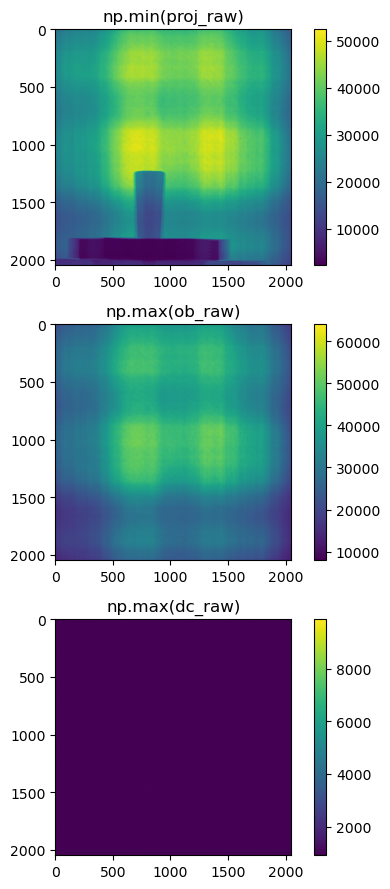

In [6]:
o_imars3dui.load_and_display_data()

# Crop

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=50, description='left', max=2047), IntSlider(value=1550, continuous_upda…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 7.73s


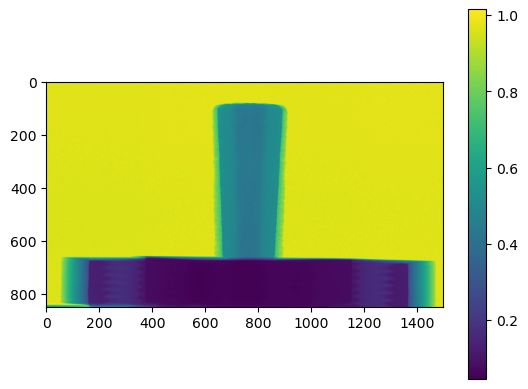

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### select beam fluctuation region

In [13]:
o_imars3dui.apply_select_beam_fluctuation()

### perform beam fluctuation correction

In [14]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

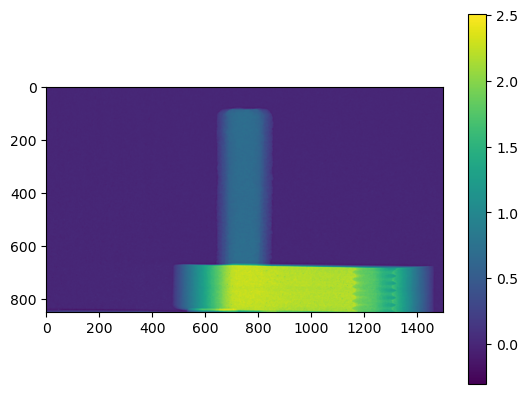

In [15]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [16]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [17]:
o_imars3dui.calculate_tilt()

### Slices to use to test tilt calculation 

In [18]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=103, description='slice1', max=849), IntSlider(value=602, description='s…

### testing tilt on selected algorithms (Zzz)

In [19]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.520 deg


Running direct minimization ... 

Applying tilt corr:   0%|          | 0/1165 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/1169 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('direct minimization',),…

## display data with tilt corrected

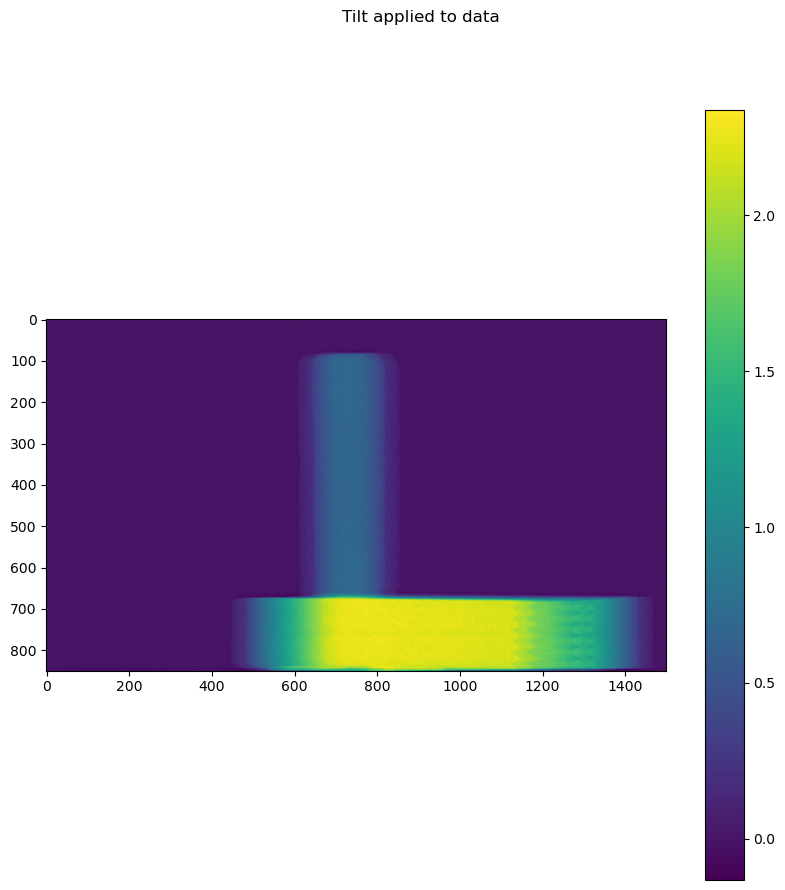

In [20]:
o_imars3dui.display_with_tilt()

# Filtering

* remove negative values

In [21]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Remove negative values')

In [22]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Display sinogram 

In [23]:
o_imars3dui.create_and_display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Ring removal

### select

In [24]:
o_imars3dui.ring_removal_options()

### apply 

In [25]:
o_imars3dui.apply_ring_removal_options()

No strikes removal using BM3D
No strikes removal using Vo
No strikes removal using Ketcham


### check 

In [26]:
o_imars3dui.test_ring_removal()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Testing reconstruction on some slides

### Select slices to reconstruct 

In [27]:
o_imars3dui.define_slices_to_test_reconstruction()

interactive(children=(IntsInput(value=[170, 340, 510, 680], description='list_slices', max=849, min=0), Output…

### Select and define algorithms to use 

In [28]:
o_imars3dui.testing_reconstruction_algorithm()

HTML(value="<font color='blue'>Define reconstruction algorithms to use and their settings:")

Accordion(children=(VBox(children=(Checkbox(value=False, description='Use this method?'), FloatText(value=1.0,…

###  Test reconstruction on those slides 

In [30]:
o_imars3dui.running_reconstruction_test()

running reconstruction test
	> testing reconstruction using svMBIR:


### Display reconstructed slices of each method 

In [ ]:
o_imars3dui.display_reconstruction_test()

# Test reconstruction algorithms

Select the algorithms you want to use to compare them on the slices you previously selected!

In [ ]:
o_imars3dui.running_reconstruction_test()

In [ ]:
=============== END OF CURRENT IMPLEMENTATION ====================

In [60]:
from imars3d.backend.reconstruction import recon
import numpy as np
import tomopy

In [40]:
proj_ring_removed = o_imars3dui.proj_ring_removed
tilt_algo_selected = o_imars3dui.o_tilt.test_tilt.result
rot_center = o_imars3dui.o_tilt.test_tilt_reconstruction[tilt_algo_selected]['center_of_rotation'][0]
theta = o_imars3dui.rot_angles_rad
from __code import AstraParameters, ReconstructionAlgo
algorithm = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.algorithm]
ratio = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.ratio]
nbr_iteration = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.nbr_iter]
filter = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.filter]

In [44]:
theta = np.array(theta)

In [61]:
rec_img = recon(arrays=proj_ring_removed,
                center=rot_center,
                theta=theta,
                algorithm=tomopy.astra,
                )

INFO:imars3d.backend.reconstruction:Executing Filter: Reconstruction


ValueError: String parameter 'algorithm' only takes a string value, not value of type <class 'function'>.

In [49]:
import matplotlib.pyplot as plt

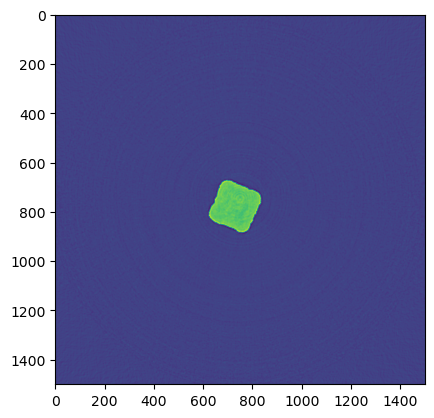

In [51]:
fig, ax = plt.subplots()
ax.imshow(rec_img[110])

In [ ]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()